### **1. Install Ultralytics**




In [1]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


### **2. Tautkan Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### **3. Unzip Dataset pada Google Drive**

In [3]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset/object detection.v1i.yolov8.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/dataset/object detection.v1i.yolov8.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/User-1-10_jpg.rf.da8baa562292b4a0ca7821fe98ba7d94.jpg  
 extracting: test/images/User-1-14_jpg.rf.f83b135d5b69baf28925ff2ec518b3c0.jpg  
 extracting: test/images/User-1-23_jpg.rf.0f22f00a89123e939db75bc735b2373f.jpg  
 extracting: test/images/User-1-9_jpg.rf.042bd61ac657e9ba1c0108946a3118bd.jpg  
 extracting: test/images/User-11-24_jpg.rf.45a9e8e6d66268958ed068855c893978.jpg  
 extracting: test/images/User-11-7_jpg.rf.67855efb77c7a894902974ae6c43de9e.jpg  
 extracting: test/images/User-12-13_jpg.rf.597c3946497c31ec32bb2f318728de36.jpg  
 extracting: test/images/User-12-18_jpg.rf.fd44fb35edbd6bdcf4be5e28e50cb9e6.jpg  
 extracting: test/images/User-12-25_jpg.rf.e58afda7776302dd97cea3c102b83f43.jpg  
 extracting: test/im

### **4. Melakukan Train Dataset**

In [4]:
!yolo train model=yolov8n.pt data=/content/data.yaml epochs=10 imgsz=224

100% 6.23M/6.23M [00:00<00:00, 170MB/s]
Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

### **5.Check Runs apakah ada**

In [5]:
import os

for root, dirs, files in os.walk('/content/runs'):
    for file in files:
        if file == 'best.pt':
            print(f"File ditemukan: {os.path.join(root, file)}")


File ditemukan: /content/runs/detect/train/weights/best.pt


### **6. Predict Gambar yang di train**

In [6]:
!yolo predict model=/content/runs/detect/train/weights/best.pt source='/content/test/images/User-1-10_jpg.rf.da8baa562292b4a0ca7821fe98ba7d94.jpg' save=True save_txt=True


Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/test/images/User-1-10_jpg.rf.da8baa562292b4a0ca7821fe98ba7d94.jpg: 224x224 1 wajah-perempuan, 75.6ms
Speed: 1.5ms preprocess, 75.6ms inference, 5.2ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


### **7. Check Gambar yang di predict tadi ada atau tidak**

In [7]:
import os

search_file_name = 'User-1-10_jpg.rf.da8baa562292b4a0ca7821fe98ba7d94.jpg'
found_files = []

for root, dirs, files in os.walk('/content/runs/detect'):
    for file in files:
        if search_file_name in file:
            found_files.append(os.path.join(root, file))

if found_files:
    for found_file in found_files:
        print(f"File ditemukan: {found_file}")
else:
    print("File tidak ditemukan.")


File ditemukan: /content/runs/detect/predict/User-1-10_jpg.rf.da8baa562292b4a0ca7821fe98ba7d94.jpg


### **8. Melakukan Analisis pada gambar yang sudah di train dan predict**

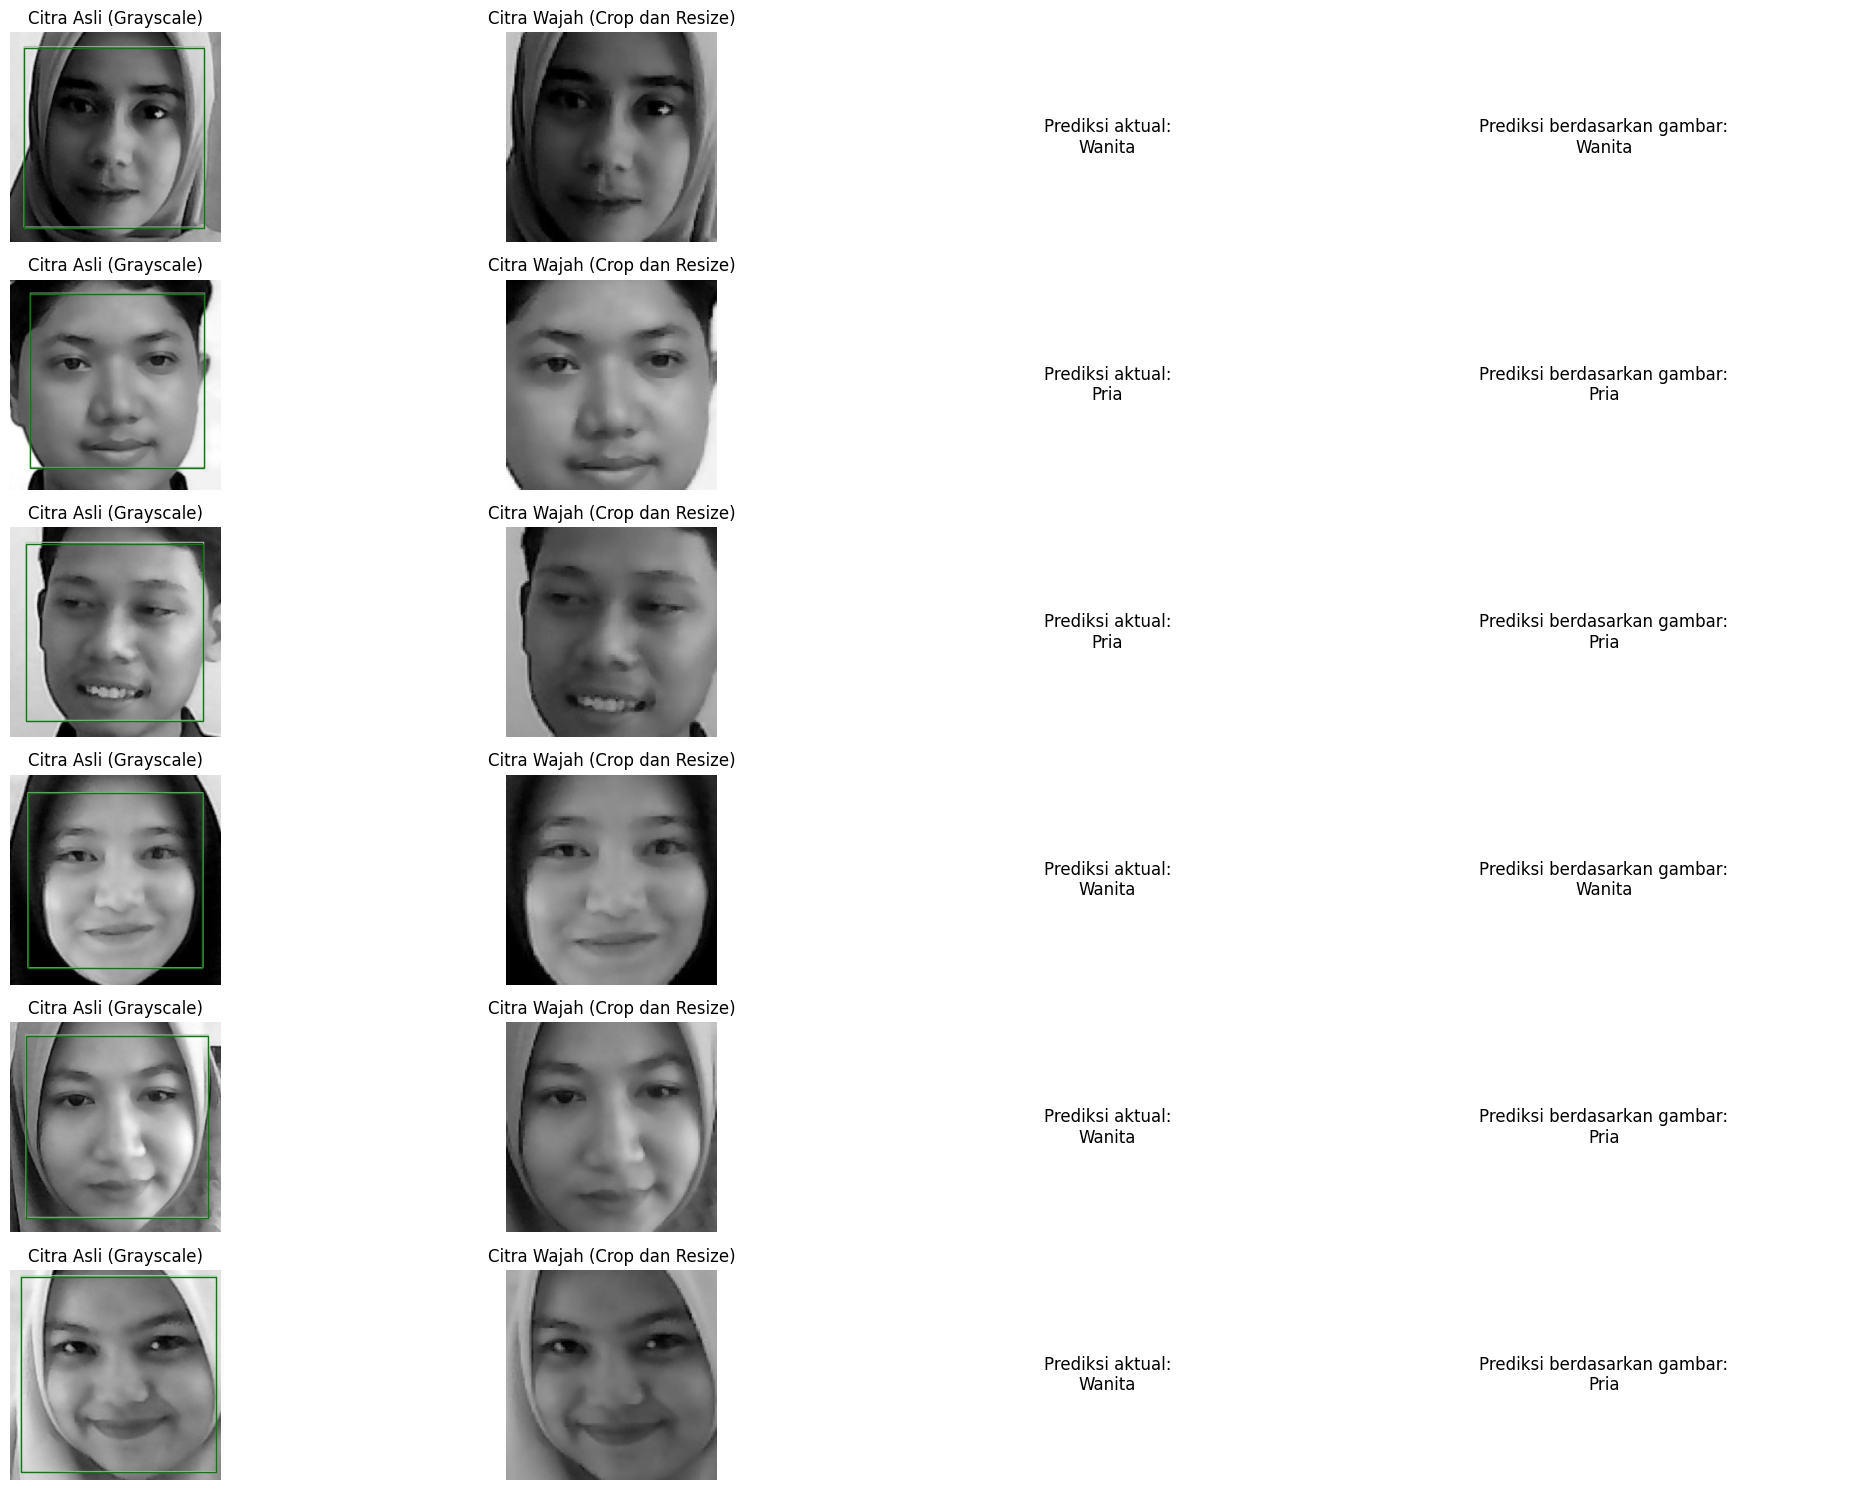

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2  # Pastikan cv2 diimpor
import numpy as np
from skimage.feature import hog
import os

# Fungsi untuk ekstraksi fitur HOG dari citra grayscale
def extract_hog_features(image):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True)
    return fd, hog_image

# Path ke gambar
image_paths = [
    '/content/test/images/User-33-20_jpg.rf.ed3bc86c5f08b18a883b0539320c48e6.jpg',
    '/content/test/images/User-30-25_jpg.rf.a9f2800beb6b0d67d6d8152f4600e4e9.jpg', # Ganti dengan path gambar lain yang Anda miliki
    '/content/test/images/User-5-20_jpg.rf.28985467fcdd613f24f1db14e940110a.jpg',
    '/content/test/images/User-4-4_jpg.rf.cdd93cc4c9c5b13fc5c6d364215fa13e.jpg',
    '/content/test/images/User-61-5_jpg.rf.f2f4b7ec7928d3c03fce251021ed373c.jpg',
    '/content/test/images/User-2-19_jpg.rf.82c1a7230e4eea35a87fef7617421595.jpg'# Ganti dengan path gambar lain yang Anda miliki
]

# Data aktual prediksi (pria atau wanita) untuk setiap gambar
actual_predictions = {
    'User-33-20_jpg.rf.ed3bc86c5f08b18a883b0539320c48e6.jpg': 'Wanita',
    'User-30-25_jpg.rf.a9f2800beb6b0d67d6d8152f4600e4e9.jpg': 'Pria',  # Ganti dengan prediksi aktual untuk gambar lain
    'User-5-20_jpg.rf.28985467fcdd613f24f1db14e940110a.jpg': 'Pria',
    'User-4-4_jpg.rf.cdd93cc4c9c5b13fc5c6d364215fa13e.jpg': 'Wanita',
    'User-61-5_jpg.rf.f2f4b7ec7928d3c03fce251021ed373c.jpg': 'Wanita',
    'User-2-19_jpg.rf.82c1a7230e4eea35a87fef7617421595.jpg': 'Wanita' # Ganti dengan prediksi aktual untuk gambar lain
}

# Inisialisasi subplot untuk menampilkan gambar secara horizontal
num_images = len(image_paths)
fig, axs = plt.subplots(num_images, 4, figsize=(20, 15))

# Jika hanya ada satu gambar, axs tidak akan menjadi array dua dimensi, tetapi hanya satu baris subplot
if num_images == 1:
    axs = np.expand_dims(axs, axis=0)

# Looping untuk setiap gambar
for i, image_path in enumerate(image_paths):
    # Membaca gambar dari path lokal
    image = cv2.imread(image_path)

    if image is not None:
        # Konversi gambar ke citra grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Inisialisasi Cascade Classifier untuk deteksi wajah
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

        # Mendeteksi wajah dalam gambar
        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        if len(faces) > 0:
            # Mengambil lokasi wajah pertama yang terdeteksi
            x, y, w, h = faces[0]

            # Gambar kotak batas wajah pada citra asli (warna asli)
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

            # Simpan citra asli dengan kotak hijau
            color_image_with_box = image.copy()

            # Crop bagian wajah dari gambar
            face_image = image[y:y+h, x:x+w]

            # Resize gambar wajah ke ukuran yang diinginkan (misalnya 100x100)
            resized_face = cv2.resize(face_image, (100, 100))

            # Ekstraksi fitur HOG dari citra grayscale wajah
            features, hog_image = extract_hog_features(cv2.cvtColor(resized_face, cv2.COLOR_BGR2GRAY))

            # Konversi citra asli menjadi grayscale untuk ditampilkan
            gray_image_for_display = cv2.cvtColor(color_image_with_box, cv2.COLOR_BGR2GRAY)

            # Menampilkan citra asli yang sudah dikonversi menjadi grayscale dalam subplot
            axs[i, 0].imshow(gray_image_for_display, cmap='gray')
            axs[i, 0].set_title('Citra Asli (Grayscale)')
            axs[i, 0].axis('off')

            # Gambar kotak hijau pada citra grayscale
            axs[i, 0].add_patch(plt.Rectangle((x, y), w, h, edgecolor='green', facecolor='none'))

            # Menampilkan citra wajah (crop dan resize) dalam subplot
            axs[i, 1].imshow(cv2.cvtColor(resized_face, cv2.COLOR_BGR2RGB))
            axs[i, 1].set_title('Citra Wajah (Crop dan Resize)')
            axs[i, 1].axis('off')

            # Menampilkan hasil prediksi aktual dalam subplot
            actual_label = actual_predictions.get(os.path.basename(image_path), "Tidak diketahui")
            axs[i, 2].text(0.5, 0.5, f"Prediksi aktual:\n{actual_label}", fontsize=12, ha='center', va='center')
            axs[i, 2].axis('off')

            # Prediksi sederhana berdasarkan gambar wajah
            mean_intensity = np.mean(cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY))
            if mean_intensity < 100:
                predicted_label = "Wanita"
            else:
                predicted_label = "Pria"

            # Menampilkan prediksi berdasarkan gambar dalam subplot
            axs[i, 3].text(0.5, 0.5, f"Prediksi berdasarkan gambar:\n{predicted_label}", fontsize=12, ha='center', va='center')
            axs[i, 3].axis('off')


        else:
            print(f"Wajah tidak terdeteksi dalam gambar: {image_path}")

    else:
        print(f"Gagal membaca gambar: {image_path}")

# Menampilkan layout subplot secara horizontal
plt.tight_layout()
plt.show()
